# Pipeline for analysising expression data using SRIQ clustering

If you are having problems with the pipeline, refer to the github page

## Pre processing raw data

Importing the appropiate directories

In [ ]:
from DE import networkAnalysis as na

clusterDirectory need to point towards directory in which all the clusters can be found. 
It will then loop through all of the data files, gathering the sample ids from all cluster and create individual .csv files for analysis in R

In [44]:
csvpath = "data/expressionData/fpkm.csv"
obj = na()
obj.readCsv(csvpath)


In [45]:
obj.preProcess()

/Users/jacobkarlstrom/miniforge3/lib/python3.9/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)
/Users/jacobkarlstrom/miniforge3/lib/python3.9/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [66]:
#Set which bottom percentage you intend to filter away
obj.gexDf

,Gene,TCGA-05-4384-01A,TCGA-05-4390-01A,TCGA-05-4396-01A,TCGA-05-4405-01A,TCGA-05-4410-01A,TCGA-05-4415-01A,TCGA-05-4417-01A,TCGA-05-4424-01A,TCGA-05-4425-01A,...,TCGA-NJ-A4YG-01A,TCGA-NJ-A4YI-01A,TCGA-NJ-A4YP-01A,TCGA-NJ-A4YQ-01A,TCGA-NJ-A55A-01A,TCGA-NJ-A55O-01A,TCGA-NJ-A55R-01A,TCGA-NJ-A7XG-01A,TCGA-O1-A52J-01A,TCGA-S2-AA1A-01A
0,ENSG00000242268.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.449352,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000167578.15,0.081465,-0.902940,-0.918857,-0.294793,0.413528,-1.593701,-0.098189,-0.630139,-0.736015,...,0.079674,1.231766,-0.298894,0.550410,0.369300,0.785215,0.384404,0.281353,0.166115,0.897892
4,ENSG00000078237.5,0.228210,0.201307,-0.353961,-0.022587,0.150245,1.087006,0.968646,-0.048298,0.528589,...,-0.257567,0.091717,-0.004611,-0.564213,-0.414924,0.873723,-0.118413,-0.403473,-0.579406,-0.212605
5,ENSG00000146083.10,0.768562,-0.238948,0.296066,-0.355703,-0.444400,-0.508061,-0.386237,-0.479742,-0.552605,...,0.416036,0.068798,0.200177,0.388845,0.103168,0.537589,0.169957,0.886962,-0.196387,0.062452
7,ENSG00000158486.12,0.000000,0.000000,0.000000,0.000000,0.271129,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.644180,0.000000,0.023596,3.098088,0.000000,0.000000,0.000000,0.712319,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60472,ENSG00000009694.12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.546712,2.360634,0.000000,0.000000,0.000000
60474,ENSG00000186115.11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60478,ENSG00000105063.17,0.082909,-0.604929,-0.595826,-0.274216,-0.005659,0.608438,-0.172804,0.404142,0.046655,...,-0.751315,0.064485,-0.369893,0.192820,0.456560,0.300422,0.971199,-0.059515,-0.208376,0.495109
60479,ENSG00000231119.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.155699,1.015756,0.000000


In [ ]:
#Writes the pre processed and filtered, MUST be .txt and tab separated values
obj.filterDf.to_csv(f'data/expressionData/tcga_log2med.txt', sep = '\t', index = False)
obj.DEGDf.to_csv(f'data/expressionData/DGEA.txt', sep = '\t', index = False)

Configure test.properties and run VRLA using following command in the same directory as VRLA:

In [ ]:
studyName='LUAD_ens_q'
studyPath='/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/expressionData/'
inFileName='tcga_log2med'
outPath='/Users/jacobkarlstrom/projekt/SRIQ/software/output/'
minBagSize=1200

obj.configResources(studyName=studyName, data = inFileName, )

Shell command running SRIQ

In [ ]:
!cd ../software/VRLA && java -jar VRLA.jar

## Expression analysis

/Users/jacobkarlstrom/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


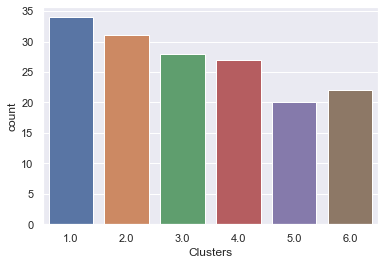

In [1]:
from DE import networkAnalysis as na

csvpath = 'data/expressionData/filtered(27k).txt'
SRIQ_cluster_path = 'data/expressionData/publication_image_10000itr_1200var_10r/10000/QC_Spiral(false)/dist(0.63)/6'

obj = na()

obj.readSRIQ(csvpath, SRIQ_cluster_path)

## Visualing genes across clusters

Set scopes to your gene format according to mygene documentation

Takes single list of genes as argument

In [ ]:
obj.plotSingleGene(['KRAS', 'EGFR'], scopes = 'ensembl.gene')

Takes list of lists of genes as argument

In [ ]:
obj.plotMultipleGenes([['KRAS', 'EGFR']], scopes = 'ensembl.gene')

## Visualization of variation

In [ ]:
obj.SilhouttePlot(sizes=150)

In [ ]:
obj.Umap()

## SAM analysis

Before running this module, the entire SRIQ folder output has to be copied to the same folder in which the expression data table is located

In [ ]:
inFileName='DGEA'
studyName = 'publication_image'
#obj.configResources(studyName=studyName, data = inFileName, )

properties = '/Users/jacobkarlstrom/projekt/SRIQ/software/VRLA/resources/test.properties'
expressionData = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/expressionData/DGEA-thresh.txt'
spiral = False
dist = 0.63
cmd = f'cd SAMDEG/dist && java -jar SAMDEG.jar {properties} {spiral} {dist} {int(obj.clusterNum)} 5 2 "{expressionData}"'

cmd

### Runs the SAM-analysis

In [ ]:
!$cmd

### Visualizing DEG

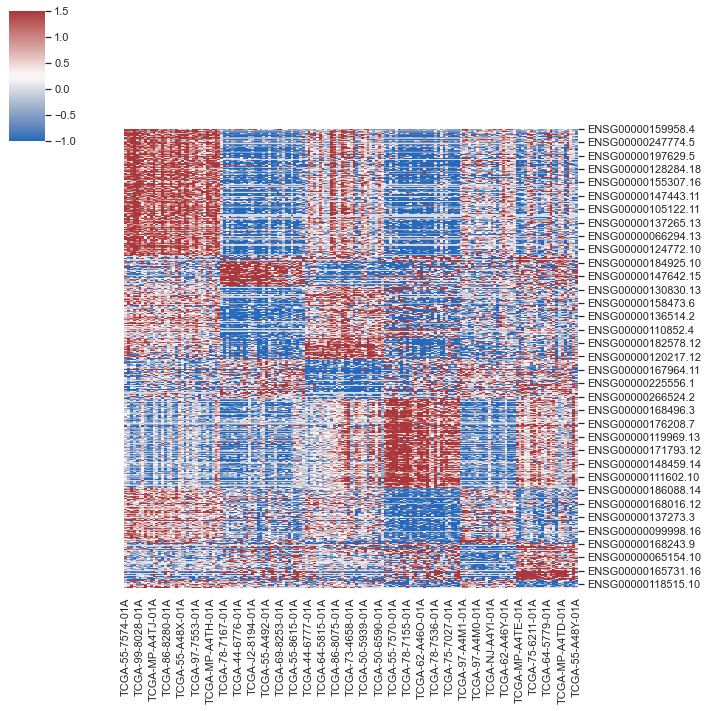

In [21]:
resultsPath = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/expressionData/publication_image_10000itr_1200var_10r/10000/QC_Spiral(false)/Results_log_0.63_6/publication_image_Data_in_6_ClusterOrder_ABS_Unique.txt'

obj.plotSamResults(resultsPath = resultsPath, q = 5, lfc = 2)


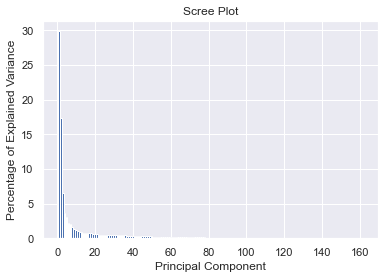

ValueError: 'c' argument has 162 elements, which is inconsistent with 'x' and 'y' with size 161.

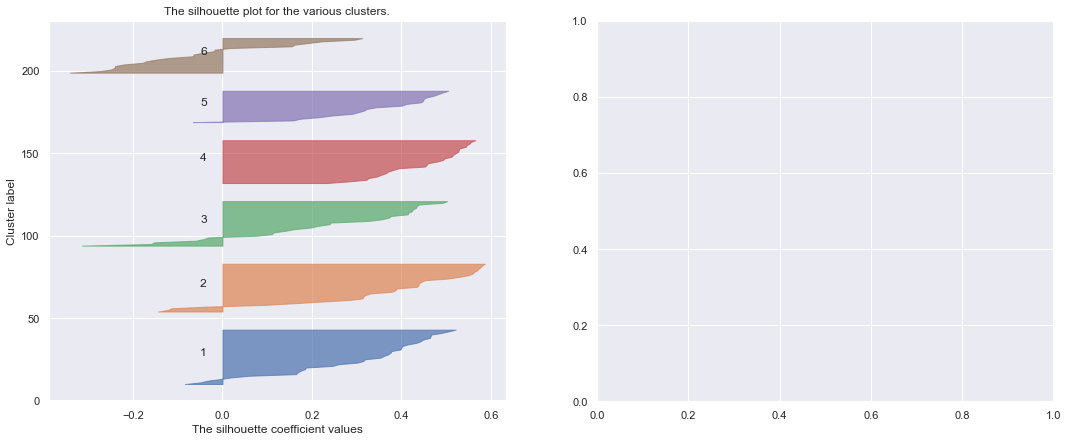

In [23]:
obj.SilhouttePlot()

In [ ]:
import seaborn as sns
pd.read_csv(resultsPath, sep = '\t')

In [ ]:
obj.samResults.to_csv('../R/data/heatmap.csv', index = False)

In [ ]:
[len(x) for x in obj.sortedClusterList]

## Enrichment analysis

Converts the enrichment list to symbols if in ensembleIDs

In [27]:
scopes = 'ensembl.gene'
obj.ensemble2gene(scopes)

Performs enrichment analysis from the differentially expressed genes.

In [28]:
enrichDbs = ['GO_Biological_Process_2018', 'GO_Cellular_Component_2018', 'GO_Molecular_Function_2018']
obj.enrichR(dbs = enrichDbs)

Running for cluster 1 up
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 1 down
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 2 up
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 2 down
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 3 up
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 3 down
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 4 up
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 4 down
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 5 up
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 5 down
GO_Biologic

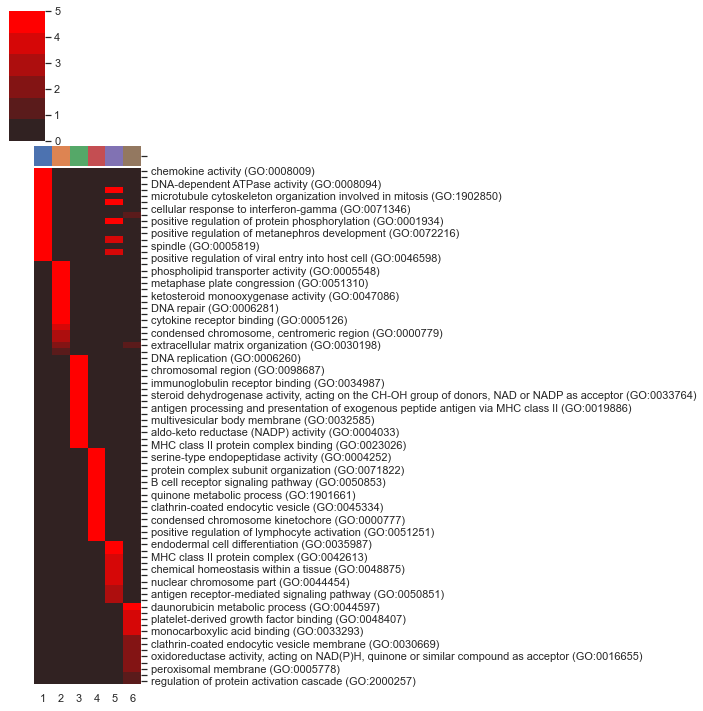

In [29]:
#up or down
import matplotlib.pyplot as plt
u_d = 'up'

g = obj.plotEnrichmentResults(u_d=u_d, yticklabels =1)

lista = [x.get_text() for x in g.ax_heatmap.get_yticklabels()]
lista = [x if i %2 == 0 else '' for i, x in enumerate(lista)]

g.ax_heatmap.set_yticklabels(lista)

lista = [x.get_text() for x in g.ax_heatmap.get_xticklabels()]
lista = [x.split(' ')[0] for i, x in enumerate(lista)]

g.ax_heatmap.set_xticklabels(lista)

#plt.savefig('GOup.pdf', dpi = 1080, bbox_inches = 'tight')